<a href="https://colab.research.google.com/github/koreabao/public_data/blob/main/%EB%82%A0%EC%94%A8_10%EB%85%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#google drive 권한 부여하기
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

In [3]:
gtp = pd.read_csv('/content/drive/MyDrive/gtp_1.csv')

In [5]:
tp1=gtp.iloc[0:, 2:4]                           # integer-location
tp1.columns = ['date', 'temperature']           # column 이름 부여하기 
tp2=tp1.copy()                                  # 데이터 복사하여 새 이름으로 저장하기
tp2['date'] = pd.to_datetime(tp2['date'])       # date 칼럼의 데이터타입을 날짜로 지정하기 
tp2.set_index('date', inplace=True)             # date 칼럼을 index로 지정하기
tp3=tp2.copy()
tp3

,temperature
date,
1907-10-01,13.9
1907-11-01,5.3
1907-12-01,-3.9
1908-01-01,-3.5
1908-02-01,-4.0
...,...
2020-08-01,26.5
2020-09-01,21.4
2020-10-01,14.3


In [6]:
pf=tp3.copy()                                   
pf1=pf.reset_index()                            # index를 column(열)으로 빼내기
pf1.columns = ['ds','y']     #ds : datestamp   페이스북 프로펫 분석에 적합하게 column이름 변경하기
                             
# 페이스북 프로펫 불러오기   Prophet에 대한 설명 https://facebook.github.io/prophet/docs/quick_start.html
from fbprophet import Prophet                
  
model = Prophet()                               # 프로펫을 모델로 이름 지정하기      

model.fit(pf1)                                  # 프로펫 모델을 이용하여 데이터패턴 발견하기 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
term=model.make_future_dataframe(periods=120, freq='MS')
prediction=model.predict(term) 
predS=prediction[['ds','yhat']]
predS1=predS.set_index('ds')


In [9]:
predS1

,yhat
ds,
1907-10-01,12.800466
1907-11-01,5.534606
1907-12-01,-2.130487
1908-01-01,-4.495356
1908-02-01,-2.397346
...,...
2030-08-01,27.388106
2030-09-01,22.408799
2030-10-01,15.766206


In [16]:
predY=predS1.resample('Y').mean() 

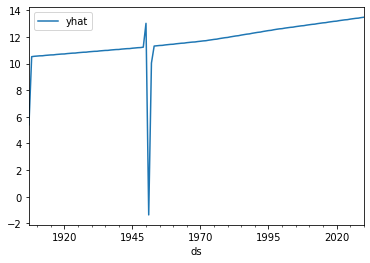

In [17]:
predY.plot()

In [19]:
pf2=pf1.set_index('ds') # 실측값pf1에 ds를 index로 정한다. 

In [23]:
pfY=pf2.resample('Y').mean() 

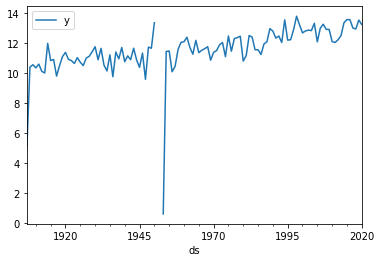

In [24]:
pfY.plot()

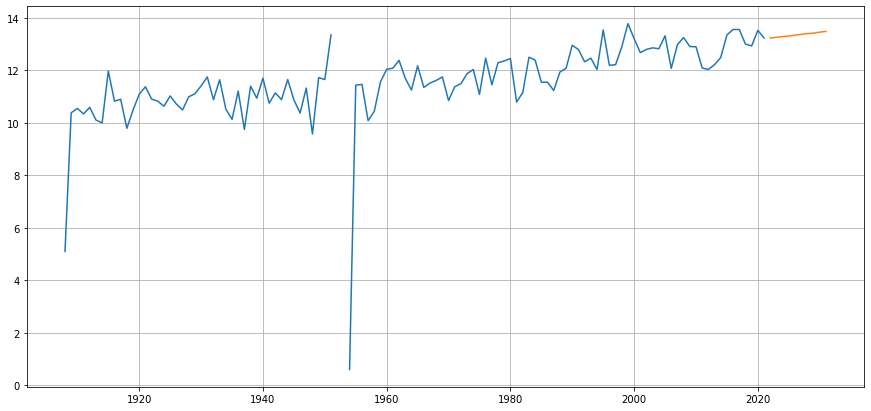

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(pfY['1907':'2020'])
plt.plot(predY['2021':])                 #plt.ylim([10,14])             # y축 최소 최대값 설정
plt.grid(True)
plt.show()